In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def loadData(trainingData,testingData):
    datatrain=np.genfromtxt(fname=trainingData,delimiter=',')
    yTrain=datatrain[:,0]
    xTrain=datatrain[:,1:]
    dataTest=np.genfromtxt(fname=testingData,delimiter=',')
    yTest=dataTest[:,0]
    xTest=dataTest[:,1:]
    return (xTrain,yTrain,xTest,yTest)

In [7]:
xTrain,yTrain,xTest,yTest=loadData('mnist_train.csv','mnist_test.csv')

In [16]:
def vector2image(imageVector,imageHeight,imageWidth):
    image=np.reshape(imageVector,(imageHeight,imageWidth))
    return image

In [29]:
index=0
image=vector2image(xTrain[index],28,28)
plt.figure()
plt.imshow(image,cmap='gray')
plt.title('xTrain['+str(index)+'], yTrain['+str(index)+'] = '+str(int(yTrain[index])))

Text(0.5,1,'xTrain[0], yTrain[0] = 5')

In [21]:
def image2vector(image):
    imageHeight,imageWidth=image.shape
    imageVector=np.reshape(image,imageWidth*imageHeight)
    return imageVector

Text(0.5,1,'xTrain[0], yTrain[0] = 5')

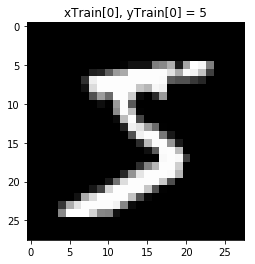

In [30]:
image=vector2image(image2vector(vector2image(xTrain[0],28,28)),28,28)
plt.figure()
plt.imshow(image,cmap='gray')
plt.title('xTrain['+str(index)+'], yTrain['+str(index)+'] = '+str(int(yTrain[index])))

In [38]:
c=10
r=16
for cx in np.arange(c):
    for rx in np.arange(r):
        image=vector2image(xTrain[yTrain==cx][rx],28,28)
        if rx==0: imageRowDigits=image
        else: imageRowDigits=np.hstack((imageRowDigits,image))
    if cx==0: imageDigits=imageRowDigits
    else: imageDigits=np.vstack((imageDigits,imageRowDigits))
plt.figure()
plt.imshow(imageDigits,cmap='gray')


In [35]:
class LR:
    def __init__(self, W):
        self.W = W
        self.delta = 0.0001
                
    def activation(self, s):
        return 1.0 / (1 + np.exp(-s)) # sigmoid function as activation function
    
    def activation_prime(self, s):
        return (activation(s) * (1.0 - activation(s))) # the derivative of activation function
    
    def feedforward(self, X):
        S = np.dot(X, self.W)
        U = self.activation(S)
        return (U)        
        
    def learn(self, X, Y, learning_rate):        
        C =  len(np.unique(Y))
        N = X.shape[0]
        Yarray = np.zeros((N, C))
        Yarray[np.arange(N), Y.astype(np.int)] = 1.0
        is_converged = False
        epoch = 1
        while not is_converged:
            U = self.feedforward(X)
            E = (U - Yarray)
            D = U * (1-U) * E
            MSE = 1.0 / (2 * N) * np.sum(np.sum(E**2, axis=1))
#            print('epoch = {0}, MSE = {1}'.format(epoch, MSE))
            Wprev = self.W.copy()
            self.W = self.W - learning_rate * 1.0/N * np.dot(X.T, D)
            epoch += 1
            if np.max(np.abs(Wprev - self.W)) <= self.delta:
                is_converged = True        
        
    def classify(self, X):
        u=self.feedforward(X)
        l=np.argmax(u,axis=1)
        return l
    
    def accuracy(self,x,y):
        N=x.shape[0]
        l=self.classify(x)
        acc=np.sum(l==y)/N
        return acc
        

In [47]:
N_train = xTrain.shape[0]
x_train = np.hstack((np.ones((N_train, 1)), xTrain)) / 255.0
N_test = xTest.shape[0]
x_test = np.hstack((np.ones((N_test, 1)), xTest)) / 255.0
C = len(np.unique(yTrain))
d = xTrain.shape[1]
W = np.random.randn(d, C) * 0.01
#print(W)
logreg = LR(W)
logreg.learn(x_train, yTrain, 0.01)
y_test_classified = logreg.classify(x_test)
#print(W)
acc=logreg.accuracy(x_test,yTest)
print('accuracy = {0}'.format(acc))

ValueError: shapes (60000,785) and (784,10) not aligned: 785 (dim 1) != 784 (dim 0)